###  Energy Generation Time Series
##### U.S. Electricity Generation (https://www.kaggle.com/datasets/ravishah1/electricity-generation-time-series)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import preprocessing
import warnings
warnings.simplefilter("ignore", UserWarning)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from scipy import signal
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from pmdarima import auto_arima 

In [2]:
us_el=pd.read_csv('electricity_data.csv')

In [3]:
us_el.head()

,Unnamed: 0,United States : all sectors,United States : electric utility,United States : independent power producers,United States : all commercial,United States : all industrial,New England : all sectors,New England : electric utility,New England : independent power producers,New England : all commercial,...,Alaska : all sectors,Alaska : electric utility,Alaska : independent power producers,Alaska : all commercial,Alaska : all industrial,Hawaii : all sectors,Hawaii : electric utility,Hawaii : independent power producers,Hawaii : all commercial,Hawaii : all industrial
0,2001-01-01,332493,236467,82269,629,13128,10005,2467,6959,68,...,590,493,20,10,67,925,524,320,--,81
1,2001-02-01,282940,199802,71169,548,11421,8662,2289,5873,65,...,546,423,22,18,84,801,457,293,--,51
2,2001-03-01,300707,211942,75758,553,12454,9506,2061,6882,70,...,587,459,23,18,88,873,573,254,--,46
3,2001-04-01,278079,197499,68356,550,11674,8321,1711,6096,70,...,489,402,17,9,61,836,522,278,--,36
4,2001-05-01,300492,215508,72658,575,11751,8592,1372,6677,72,...,485,395,16,8,65,886,539,310,--,37


In [4]:

us_el.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
us_el['Date']=pd.to_datetime(us_el['Date'])


In [5]:
us_el_selected = us_el.loc[:,:'United States : all sectors']

In [6]:
us_el_selected.tail(10)

,Date,United States : all sectors
245,2021-06-01,373754
246,2021-07-01,404749
247,2021-08-01,413353
248,2021-09-01,348201
249,2021-10-01,319638
250,2021-11-01,315495
251,2021-12-01,339684
252,2022-01-01,378967
253,2022-02-01,327767
254,2022-03-01,325952


In [7]:
len(us_el_selected)

255

In [8]:
us_el_selected.describe()

,United States : all sectors
count,255.000000
mean,336775.325490
std,34285.028716
min,278079.000000
25%,309887.000000
50%,327936.000000
75%,357726.000000
max,421797.000000


In [9]:
us_el_selected.isna().sum()

Date                           0
United States : all sectors    0
dtype: int64

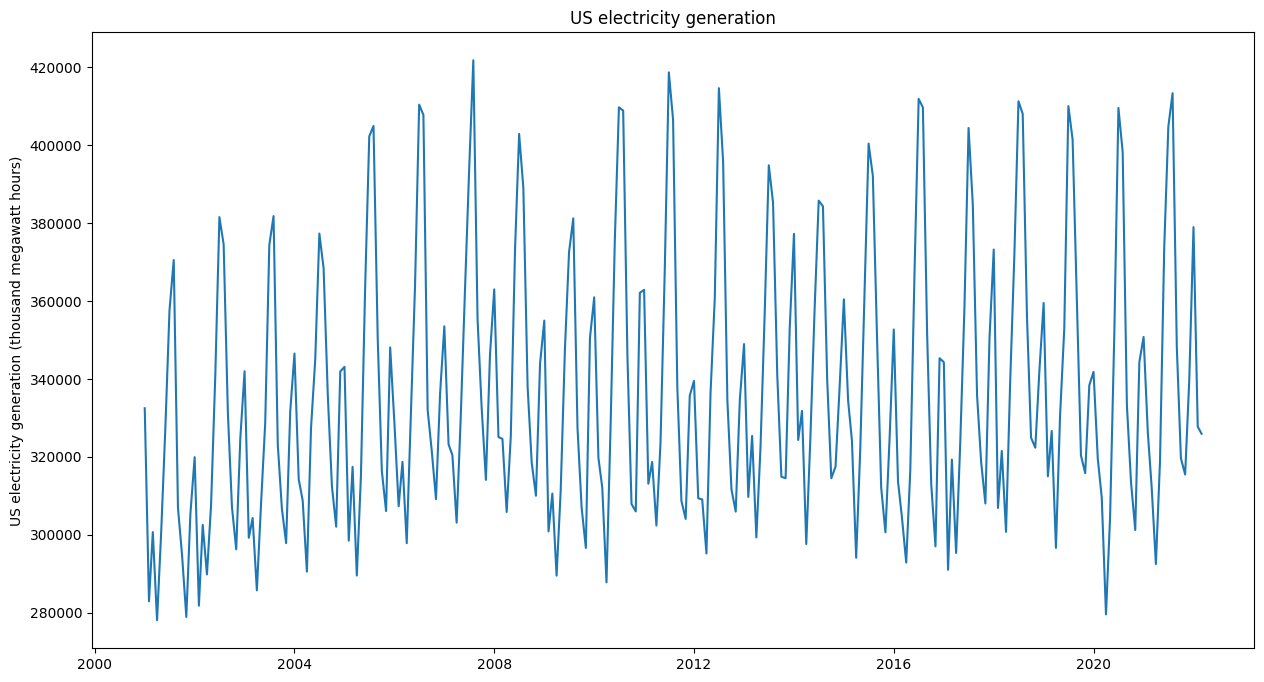

In [10]:
plt.figure(figsize=(15,8))
plt.plot(us_el_selected['Date'], us_el_selected["United States : all sectors"])
plt.title('US electricity generation')
plt.ylabel('US electricity generation (thousand megawatt hours)')
plt.show();

In [11]:
us_el_selected['year']=us_el_selected['Date'].dt.year
us_el_selected['month']=us_el_selected['Date'].dt.month
us_el_selected['quarter']=us_el_selected['Date'].dt.quarter

''

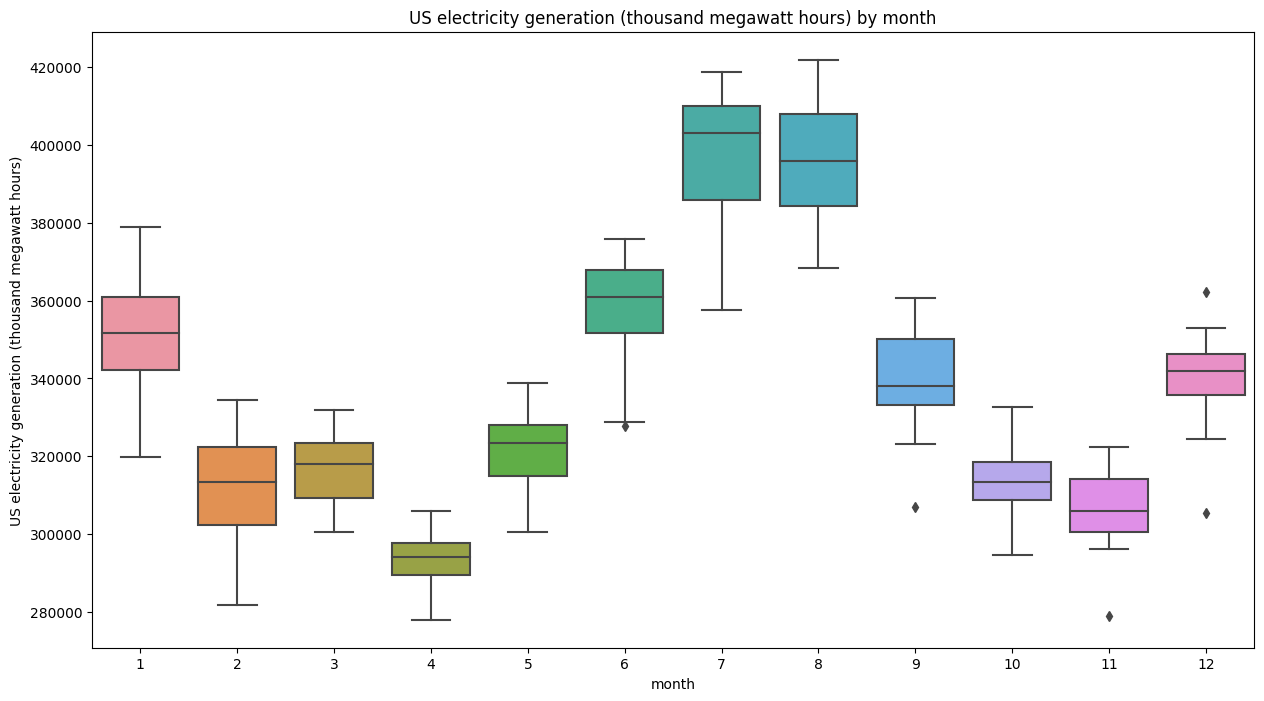

In [12]:
fig, ax =  plt.subplots(figsize = (15, 8))
sns.boxplot(data=us_el_selected, x='month', y="United States : all sectors")
ax.set_title('US electricity generation (thousand megawatt hours) by month')
ax.set_xlabel('month')
ax.set_ylabel('US electricity generation (thousand megawatt hours)')
;

''

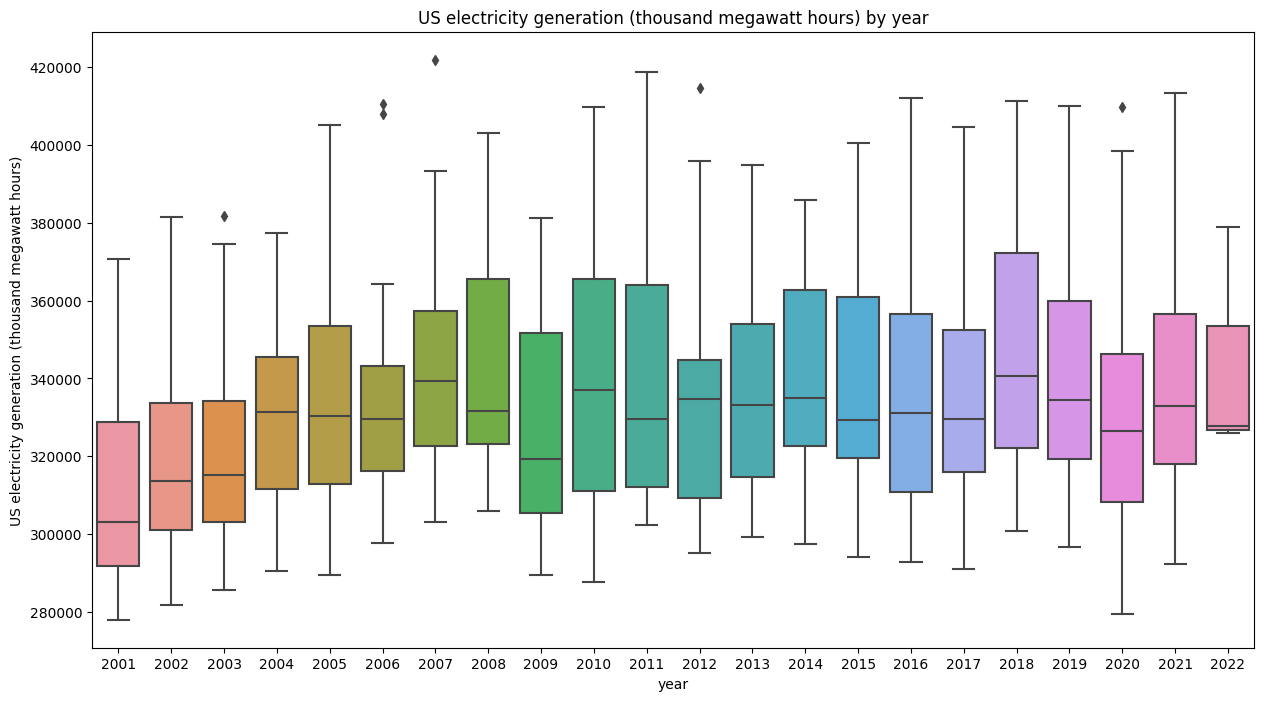

In [14]:
fig, ax =  plt.subplots(figsize = (15, 8))
sns.boxplot(data=us_el_selected, x='year', y="United States : all sectors")
ax.set_title('US electricity generation (thousand megawatt hours) by year')
ax.set_xlabel('year')
ax.set_ylabel('US electricity generation (thousand megawatt hours)')
;

In [15]:
year_df = us_el_selected.groupby('year')['United States : all sectors'].agg(['sum','mean']).reset_index()
month_df = us_el_selected.groupby('month')['United States : all sectors'].agg(['sum','mean']).reset_index()
quarter_df = us_el_selected.groupby('quarter')['United States : all sectors'].agg(['sum','mean']).reset_index()

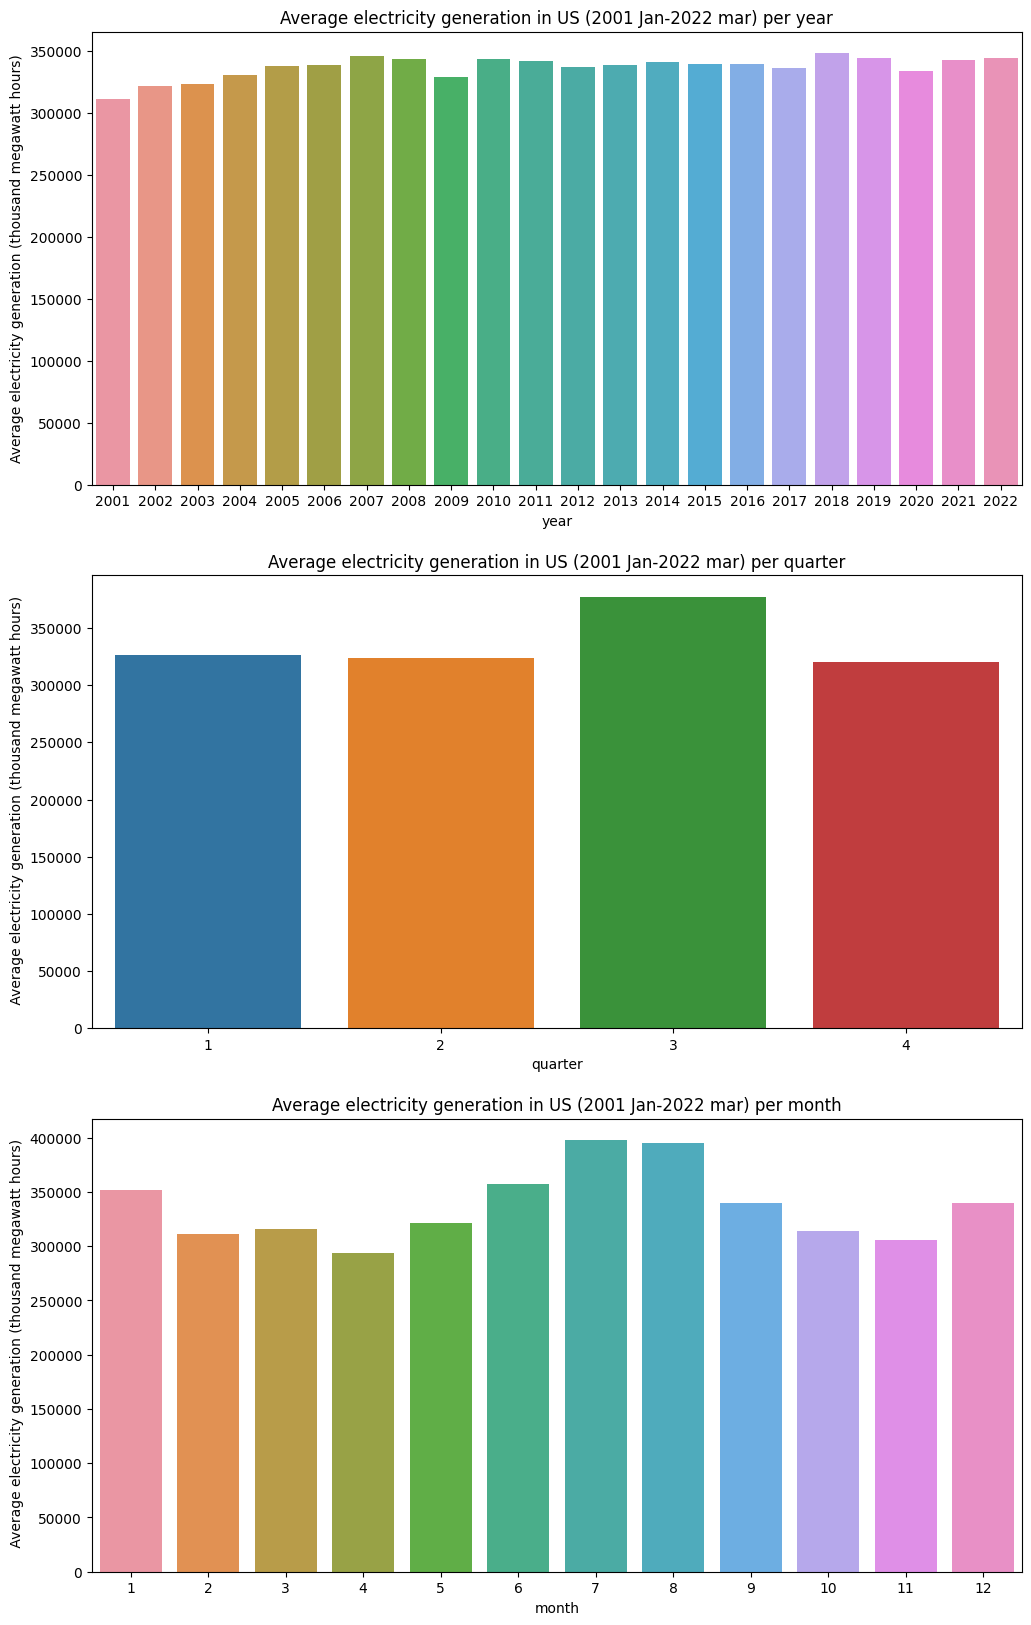

''

In [16]:
fig, ax =  plt.subplots(3,1, figsize = (12, 20))
# fig.tight_layout(pad=8.0)
sns.barplot(data=year_df, x='year', y='mean', ax=ax[0]).set(title='Average electricity generation in US (2001 Jan-2022 mar) per year', ylabel='Average electricity generation (thousand megawatt hours)')
sns.barplot(data=quarter_df, x='quarter', y='mean', ax=ax[1]).set(title='Average electricity generation in US (2001 Jan-2022 mar) per quarter', ylabel=' Average electricity generation (thousand megawatt hours)')
sns.barplot(data=month_df, x='month', y='mean',ax=ax[2]).set(title='Average electricity generation in US (2001 Jan-2022 mar) per month', ylabel=' Average electricity generation (thousand megawatt hours)')
# fig.suptitle('Electricity generation in US (2001 Jan-2022 mar)', fontsize=20)
plt.show()

;

In [ ]:
us_el_selected.to_csv('us_el_selected.csv')

Source/Reference:

https://www.kaggle.com/datasets/ravishah1/electricity-generation-time-series

https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python


